In [13]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

from __future__ import print_function, \
    division, \
    absolute_import

import os

import sep
import h5py

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

from astropy.io import fits
from astropy.modeling import models, fitting

#---------------------------------------------------------------------------#
#User imports
import sys
sys.path.append('/Users/fardila/Documents/Github/kungpao')
from kungpao.galsbp import galSBP
from kungpao.display import display_single, random_cmap


In [2]:
# For Kungpao
x_images = '/Users/fardila/anaconda/envs/hsc_hydro/iraf/bin.macosx/x_images.e'
x_ttools = '/Users/fardila/anaconda/envs/hsc_hydro/iraf_extern/tables/bin.macosx/x_ttools.e'
x_isophote = '/Users/fardila/anaconda/envs/hsc_hydro/iraf_extern/stsdas/bin.macosx/x_isophote.e'
#---------------------------------------------------------------------------#

#---------------------------------------------------------------------------#
# About the Colormaps
IMG_CMAP = plt.get_cmap('viridis')
IMG_CMAP.set_bad(color='black')

SEG_CMAP = random_cmap(ncolors=512, background_color=u'white')
SEG_CMAP.set_bad(color='white')
SEG_CMAP.set_under(color='white')

In [3]:
from pyraf import iraf

iraf.tables()
iraf.stsdas()
iraf.analysis()
iraf.isophote()

iraf.unlearn('ellipse')
iraf.unlearn('bmodel')



      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |    
      |                  TABLES Version 3.17                       |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |    
      |                   STSDAS Version 3.17                      |
      |                   

In [57]:
#import functions from module
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

## Plot residuals

In [119]:
import pickle
file_prefix='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/Illustris_0_xy_cen'
map_file=file_prefix + '.fits'
iso_file=file_prefix + '_ellip_3.pkl'
iso_bin=file_prefix + '_ellip_3.bin'

In [120]:
pklFile = open(iso_file, 'rb')
iso = pickle.load(pklFile)    
pklFile.close()

In [122]:
Illustris_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'
TNG_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'

In [123]:
img_cen, _, pixel_scale, m_cat = get_mass_maps(Illustris_file_quick,0)

Creating rebinned temporary table...

Creating image and filling background value...
Building model...
a0 = 196.         
   0.08  CPU seconds.
   0.00  minutes elapsed.


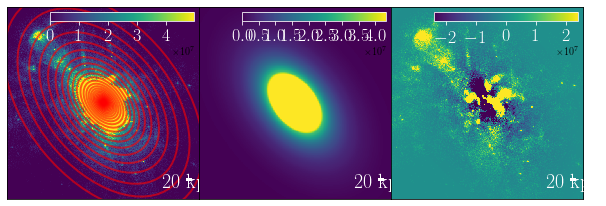

In [158]:
# Here, we use the stsdas.isophote.analysis.bmodel function to reconstruct 
# a 2-D model using the isophote information 
# So that we can subtract it from the original image, and see how well it does.


iraf.bmodel(parent=map_file, 
            table=iso_bin,
            output=file_prefix + '_smooth_model.fits[0]',
            minsma=0.0,
            highar = 'no', verbose='yes') #If the 'highar' parameter has the value "yes", the 3rd and 4th harmonics from the photometry are added to the model.

img_cen_ellip_1 = fits.open(file_prefix + '_smooth_model.fits')[0].data

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.0, wspace=0.0, 
                    left=0.0, bottom=0.0,
                    top=1.0, right=1.0)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1 = display_single(img_cen , 
                     ax=ax1,
                     contrast=0.15,
                     scale_bar_length=20.0,
                     scale_bar_loc='right',
                     stretch='linear',
                     pixel_scale=1.0,
                     physical_scale=pixel_scale,
                     color_bar=True)

ax2 = display_single(img_cen_ellip_1 , 
                     ax=ax2,
                     contrast=0.15,
                     scale_bar_length=20.0,
                     scale_bar_loc='right',
                     stretch='linear',
                     pixel_scale=1.0,
                     physical_scale=pixel_scale,
                     color_bar=True)

ax3 = display_single(img_cen - img_cen_ellip_1 , 
                     ax=ax3,
                     contrast=0.15,
                     scale_bar_length=20.0,
                     scale_bar_loc='right',
                     stretch='linear',
                     pixel_scale=1.0,
                     physical_scale=pixel_scale,
                     color_bar=True)

# Overplot a subsample of isophotes on the image
iso_cen_1_ellip = galSBP.convIso2Ell(iso)
for ii, e in enumerate(iso_cen_1_ellip):
    if (ii % 3 == 0):
        ax1.add_artist(e)
        e.set_clip_box(ax1.bbox)
        e.set_alpha(0.6)
        e.set_edgecolor('r')
        e.set_facecolor('none')
        e.set_linewidth(2.0)

# Here, we can see the model becomes off-center quickly, and it reveals many 
# diffuse features underneath.

In [ ]:
#plot image, smooth, residual, 
#save for all
#mass differences

In [164]:
#mass sums
m_post = np.log10(np.sum(img_cen))
m_model = np.log10(np.sum(img_cen_ellip_1))
m_residual = np.sum(img_cen - img_cen_ellip_1)


In [165]:
print(m_post)
print(m_model)
print(m_residual)

12.4134130896
12.4204
-42179229313.5


In [162]:
np.log10(np.sum(img_cen_ellip_1-img_cen))

10.625098640174366

In [167]:
oneD_mass(iso,800./pixel_scale)

12.259311793445942

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0.5,0,u'$\\mathrm{\\log{(SMA/kpc)}}$')

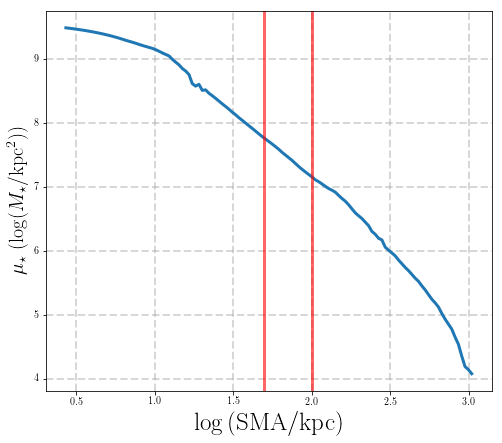

In [168]:
fig = plt.figure(figsize=(8, 7))

plt.grid(linewidth=2.0, linestyle='--', alpha=0.5)

plt.plot(np.log10(iso['sma_kpc']), 
         np.log10(iso['intens_kpc']), linewidth=3.0)

# x=np.linspace(0.5,3)
# plt.plot(x, line(x,*p_fit), linewidth=3.0)

plt.ylabel(r'$\mu_{\star}\ (\log(M_{\star}/\mathrm{kpc}^2))$', fontsize=20)
plt.axvline(np.log10(100.0), linestyle='-', linewidth=3.0, alpha=0.6, c='r')
plt.axvline(np.log10(50), linestyle='-', linewidth=3.0, alpha=0.6, c='r')
#plt.xlim(0, 300)
plt.xlabel(r'$\mathrm{\log{(SMA/kpc)}}$', fontsize=25)

In [166]:
iso

sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,114307000000.0,nan,nan,nan,nan,nan,nan,nan,150.0,nan,150.0,nan,-54110890000.0,nan,nan,0.0,-27.64518,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-24.0101884273,-24.0101884273,-24.0101884273,114307000000.0,0.0,nan,nan,nan,0.0,0.0,0.0,0.0,150.0,150.0,0.62,39.2,1686693.0,114305313307.0,-24.0101724063,0.0,53.6349472349,-30.8493252764,-30.8559482285,-30.8559482285,0.0,4018605468.75
0.5095395,86735360000.0,3397065000.0,17321700000.0,12248290000.0,0.38,0.07354437,39.2,7.069705,150.0,0.02428392,150.0,0.02642455,-49433880000.0,98997400000.0,2.002622,0.8448789,-27.34549,0.04337985,0.0417113,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.06374995,0.1374446,0.0072757,0.05124049,-0.04876725,0.09802008,-0.1480554,0.2966082,13,0,1.0,0.0,nan,2.0,-40632904.0,203324768.0,154565168.0,196607696.0,-81836704.0,196467744.0,139052208.0,189839136.0,39.2,-23.7104968238,-23.7104968238,-23.7104968238,86735360000.0,0.0,0.0417121761599,-23.752209,-23.6687846476,2.717544,1.28393827645,0.0,0.0,150.0,150.0,0.62,39.2,1686693.0,86733673307.0,-23.7104757099,0.0,53.6349472349,-30.8493252764,-30.8559482285,-30.8559482285,2.717544,3049290000.0
0.5350164,85470540000.0,3563121000.0,18168420000.0,12847020000.0,0.38,0.07294497,39.2,7.012086,150.0,0.0252903,150.0,0.02751964,-48981140000.0,98889220000.0,2.018924,0.8552474,-27.32954,0.04623207,0.04434535,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.06451424,0.1396355,0.007419517,0.05082111,-0.04790892,0.09707583,-0.1464497,0.2957775,13,0,1.0,0.0,nan,2.0,-41787436.0,208679488.0,158043888.0,201785520.0,-84177800.0,201680464.0,142104832.0,194875984.0,39.2,-23.6945474799,-23.6945474799,-23.6945474799,85470540000.0,0.0,0.0443444594844,-23.7388919394,-23.6502030204,2.8534208,1.29969502242,4430332064.41,4430332064.41,150.0,150.0,0.62,39.2,1686693.0,85468853307.0,-23.6945260535,4430244635.33,53.6349472349,-30.8493252764,-30.8559482285,-30.8559482285,2.8534208,3004823671.88
0.5617672,84154160000.0,3737244000.0,19056280000.0,13474830000.0,0.38,0.07230197,39.2,6.950275,150.0,0.02632073,150.0,0.02864091,-48512070000.0,98780420000.0,2.036203,0.8657432,-27.31269,0.0493203,0.04717726,114307000000.0,114307000000.0,-27.64518,-27.64518,1.0,1.0,-0.06532715,0.1420017,0.007568762,0.05037279,-0.0469807,0.09600665,-0.1447193,0.2947815,13,0,1.0,0.0,nan,2.0,-42912648.0,213716368.0,161280000.0,206656000.0,-86461592.0,206583696.0,144928208.0,199613792.0,39.2,-23.6776953337,-23.6776953337,-23.6776953337,84154160000.0,0.0,0.0471770317502,-23.7248723655,-23.630518302,2.99609173333,1.31564517271,9239554604.0,9239554604.0,150.0,150.0,0.62,39.2,1686693.0,84152473307.0,-23.6776735722,9239370784.18,53.6349472349,-30.8493252764,-30.8559482285,-30.8559482285,2.99609173333,2958544687.5
0.5898556,82784810000.0,3919759000.0,19986930000.0,14132890000.0,0.3

# testing 

In [132]:
def get_masses(sim_file, sim_name, gal_n=0):
    #central pixels
    x0=150.
    y0=150.

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
    #save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    data=mass_map_cen
    suffix='_cen'

    ###########################################################################
    #get background
    bkg = sep.Background(data, bw=10, bh=10, fw=5, fh=5)
    bkg_subtraced_data = data - bkg

    thresh = 50 * bkg.globalrms
    objects = sep.extract(bkg_subtraced_data, thresh, minarea = 100,
                          deblend_nthresh=24, deblend_cont=0.1)

    #find object closest to image center
    obj = find_closest(objects, x0=x0, y0=y0)

    #ellipse parameters
    theta = obj['theta']
    q = obj['b']/ obj['a']

    a_10, a_30, a_100 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale)
    b_10, b_30, b_100 =  a_10 * q, a_30 * q, a_100 * q



    # plot background-subtracted image
    m, s = np.mean(data), np.std(data)
    fig, ax = plt.subplots()
    im = ax.imshow(data, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    e_30 = Ellipse(xy=(obj['x'], obj['y']),
                 width=a_30,
                 height=b_30,
                 angle=theta * 180. / np.pi)
    e_30.set_facecolor('none')
    e_30.set_edgecolor('red')
    ax.add_artist(e_30)

    e_100 = Ellipse(xy=(obj['x'], obj['y']),
                 width=a_100,
                 height=b_100,
                 angle=theta * 180. / np.pi)
    e_100.set_facecolor('none')
    e_100.set_edgecolor('red')
    ax.add_artist(e_100)


#     plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/ellipses/quick_800/'+file_name)
    plt.show()
#     plt.clf()

    ###########################################################################
    #2D masses
    flux_10, fluxerr_10, flag_10 = sep.sum_ellipse(data, x0, y0,
                                                   a_10, b_10, theta)
    flux_30, fluxerr_30, flag_30 = sep.sum_ellipse(data, x0, y0,
                                                   a_30, b_30, theta)
    flux_100, fluxerr_100, flag_100 = sep.sum_ellipse(data, x0, y0,
                                                      a_100, b_100, theta)

    ###########################################################################
    #1D masses from galSBP
    iso, iso_bin = galSBP.galSBP(maps_location+file_name+suffix+'.fits',
                                         galX=x0,
                                         galY=y0,
                                         galQ=q,
                                         galPA=theta* -180. / np.pi,
                                         maxSma=250,
                                         iniSma=50.0,
                                         stage=3,
                                         intMode='median',
                                         ellipStep=0.05,
                                         pix=pixel_scale,
                                         zpPhoto=0.0,
                                         isophote=x_isophote,
                                         xttools=x_ttools,
                                         recenter=True,
                                         savePng=False,
                                         verbose=True)


        ###########################################################################
    iso['sma_kpc'] = iso['sma'] * pixel_scale
    iso['intens_kpc']=iso['intens'] / (pixel_scale**2)

    m_1d_10, m_1d_30, m_1d_100 = oneD_mass(iso, 10.), \
                                oneD_mass(iso, 30.), \
                                oneD_mass(iso, 100.)

    #integrated mass from extrapolation
    extrap_mass = extrapolated_1D_mass(iso, 800)

#     except:
#         iso,m_1d_10, m_1d_30, m_1d_100, extrap_mass  = -99.99, -99.99, -99.99, -99.99, -99.99


    m_2d_10, m_2d_30, m_2d_100 = np.log10(flux_10), \
                                np.log10(flux_30), \
                                np.log10(flux_100)


    masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10,
            m_2d_30, m_2d_100, extrap_mass]

    return iso, masses, iso_bin

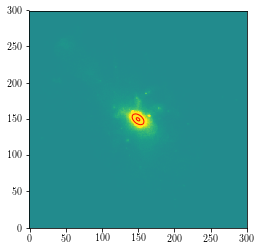

----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/Illustris_0_xy_cen.fits
###      Input Image   : temp_38ODM.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/Illustris_0

In [157]:
from matplotlib.patches import Ellipse
iso, masses, iso_bin = get_masses(Illustris_file_quick, 'Illustris')

In [127]:
iso_bin

'/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/Illustris_0_xy_cen_ellip_3.bin'